# NP1 Atmospheric $\mathrm{CO_2}$ measurements
*Gerbrand Koren (g.b.koren@uu.nl)*

-----------

### Introduction

This is the first practical of the course Natural Processes (GEO1-2412). In the computer practicals we will explore different processes that are related to the global carbon cycle and that link to the topics that are discussed during the lectures. This first practical will explore measurements of $\mathrm{CO_2}$ concentrations from the atmosphere collected by the [US National Oceanic and Atmospheric Administration (NOAA)](https://www.noaa.gov/) since the 1960s. The goal of this assignment is to practice data analysis in Python, describe patterns in observed $\mathrm{CO_2}$ concentrations and relate this to natural processes.

<div class="alert alert-block alert-success">
<b> Instruction:</b> Execute the code cell below to clear the memory and import packages that we will need for the subsequent analysis. You can execute the cell by selecting it and pressing <code>ctrl</code> + <code>enter</code> or by selecting a cell and pressing the run button in the toolbar on top. If this gives an error then make sure that you have selected the right kernel.</div>

In [3]:
# Here we clear the memory
%reset -f

# Here we import packages that we will use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


<div class="alert alert-block alert-success">
<b> Instruction:</b> Insert for one of the students their student number (<code>student_number=...</code>). This will automatically personalize the questions. Make sure that the student number is typed correct, this will also be used when grading the assignment. When working together in a pair then just choose one of the student numbers.</div>

In [4]:
# Fill in your student number in the line below
student_number = 0

NOAA has many monitoring stations across the world to sample air and measure concentrations of various gases, including $\mathrm{CO_2}$. The four most important stations are the [Baseline Observatories](https://gml.noaa.gov/obop/) that are distributed across a latitudinal gradient (see Fig. 1). 

<img src="https://gml.noaa.gov/obop/obsmap.png" width="600"/>

*__Figure 1:__ Locations of NOAA Baseline Observatories, from top to bottom: Barrow (Alaska), Mauna Loa (Hawaii), American Samoa, South Pole (Antarctica) (source: NOAA)*

These measurement stations are all positioned in relatively remote places to have fewer local disturbances (from fossil fuel combustion) which makes measurements more informative on large-scale atmospheric changes. 

### Mauna Loa

We will first explore $\mathrm{CO_2}$ measurements from Mauna Loa (often abbreviated as "MLO"). The station (Fig. 2) is located on a volcano at an altitude of 3400 m and measurements have started around 1960, when there was much less concern about $\mathrm{CO_2}$ and climate change. We will now explore a dataset that was taken from https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mlo_surface-flask_1_ccgg_month.txt

<img src="https://gml.noaa.gov/images/ssimg2.jpg" width="600"/>

*__Figure 2__: Mauna Loa (MLO) measurement station (source: NOAA)*

<div class="alert alert-block alert-success">
<b> Instruction:</b> Now let's load a dataset with monthly $\mathrm{CO_2}$ data from Mauna Loa by running the code below. Inspect how many data points the dataset contains and which three variables are in this dataset.</div>

In [ ]:
# This will read the MLO dataset and give names to the columns
mlo = pd.read_fwf(
    "co2_mlo_surface-flask_1_ccgg_month.txt",
    skiprows=54,
    header=None,
    names=["code", "year", "month", "co2"],
)

# This line displays the start and end of the MLO dataset on screen
mlo

,code,year,month,co2
0,MLO,1969,8,322.50
1,MLO,1969,9,321.36
2,MLO,1969,10,320.74
3,MLO,1969,11,321.98
4,MLO,1969,12,323.78
...,...,...,...,...
594,MLO,2024,8,422.72
595,MLO,2024,9,421.88
596,MLO,2024,10,422.57
597,MLO,2024,11,423.81


<div class="alert alert-block alert-success">
<b> Instruction:</b> To help plotting data later on, we will add a new column <code>frac_year</code> by running the code below.</div>

In [ ]:
# Define fractional year variable
mlo["frac_year"] = mlo["year"] + mlo["month"] / 12.0

# Display the first and last entries of the MLO dataset
mlo

,code,year,month,co2,frac_year
0,MLO,1969,8,322.50,1969.666667
1,MLO,1969,9,321.36,1969.750000
2,MLO,1969,10,320.74,1969.833333
3,MLO,1969,11,321.98,1969.916667
4,MLO,1969,12,323.78,1970.000000
...,...,...,...,...,...
594,MLO,2024,8,422.72,2024.666667
595,MLO,2024,9,421.88,2024.750000
596,MLO,2024,10,422.57,2024.833333
597,MLO,2024,11,423.81,2024.916667


<div class="alert alert-block alert-success">
<b> Instruction:</b> Now let's create a time series plot for $\mathrm{CO_2}$ measurements from Mauna Loa. Note that the straight line that appears somewhere between 1970 and 1980 is caused by a gap in the data record.</div>

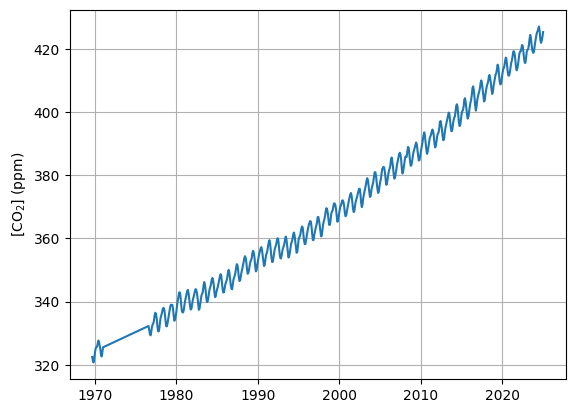

In [ ]:
# Show CO2 time series for Mauna Loa
plt.figure()
plt.plot(mlo["frac_year"], mlo["co2"])
plt.ylabel("[CO$_2$] (ppm)")
plt.grid()
plt.show()

<div class="alert alert-block alert-danger">
(1 pt) <b> Question 1:</b> Why is the $\mathrm{CO_2}$ concentration measured at Mauna Loa increasing in the long-term? (limit your answer to max. 20 words).</div>

(enter here your answer to Q1)

<div class="alert alert-block alert-success">
<b> Instruction:</b> We will now define a function (<code>mlo_fit</code>) that first performs a polynomial fit through the MLO measurements and then makes a prediction for a selected range of years (<code>fit_range</code>). The output will then be visualized. Explore visually the agreement between the measured and fitted $\mathrm{CO_2}$ when varying the <code>fit_degree</code> between 1, 2 and 3.</div>

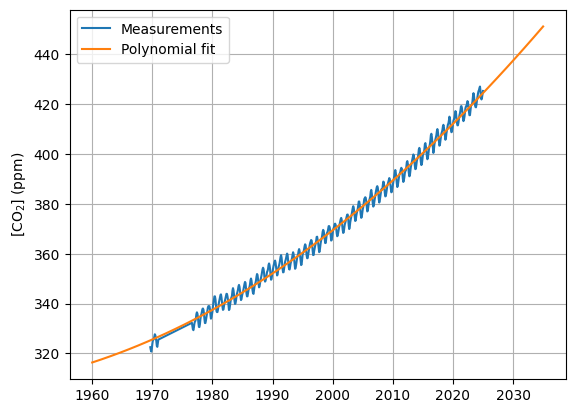

In [ ]:
# Define polynomial fit function for MLO
def mlo_fit(fit_range, fit_degree):
    x_obs = mlo["frac_year"]
    y_obs = mlo["co2"]
    coeffs = np.polyfit(x_obs, y_obs, fit_degree)
    fit = np.poly1d(coeffs)
    fit_prediction = fit(fit_range)
    return fit_prediction


# Select fit properties
fit_degree = 2
fit_range = np.linspace(1960, 2035)

# Dipsplay CO2 measurements and fit
plt.figure()
plt.plot(mlo["frac_year"], mlo["co2"], label="Measurements")
plt.plot(fit_range, mlo_fit(fit_range, fit_degree), label="Polynomial fit")
plt.ylabel("[CO$_2$] (ppm)")
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
<b> Instruction:</b> We can use the function that we defined above (<code>mlo_fit</code>) also to provide us an estimate of $\mathrm{CO_2}$ in a single year. Test the code below for different values of <code>fit_year</code> and <code>fit_degree</code>. (Note that polynomial fit functions can become very unreliable outside the range where they were trained on.)</div>

In [ ]:
# Estimate CO2 value in selected year
fit_year = 2030
fit_degree = 1
print(
    f"The estimated CO2 concentration in year {fit_year} is {mlo_fit(fit_year, fit_degree):.1f} ppm."
)

The estimated CO2 concentration in year 2030 is 427.7 ppm.


<div class="alert alert-block alert-danger">
(2 pts) <b> Question 2:</b> Assuming that $\mathrm{CO_2}$ emissions follow the patterns from the last 30 years, what would you expect for $\mathrm{CO_2}$ in 2030, 2050 and 2100? Also comments on the reliability of these estimates. To answer this question you can use the code in the cell above and adjust variables. (limit your answer to max. 40 words).</div>

(enter here your answer to Q2)

<div class="alert alert-block alert-success">
<b> Instruction:</b> Now let's zoom in on shorter period by selecting a decade within the record. Please note that the selection depends on the student number so is not the same for everyone in class.</div>

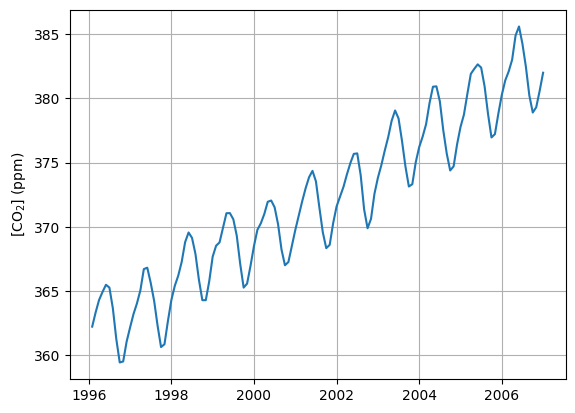

In [ ]:
# Select random decade from MLO record
np.random.seed(student_number)
start_year = int(30 * np.random.rand()) + 1980
mlo_zoom = mlo[(mlo["year"] >= start_year) & (mlo["year"] <= start_year + 10)]

# Plot decade from MLO record
plt.figure()
plt.plot(mlo_zoom["frac_year"], mlo_zoom["co2"])
plt.ylabel("[CO$_2$] (ppm)")
plt.grid()
plt.show()

<div class="alert alert-block alert-danger">
(1 pt) <b> Question 3:</b> After zooming in it becomes clearer that there is a seasonal variation in atmospheric $\mathrm{CO_2}$. What drives this pattern? (limit your answer to max. 20 words).</div>

(enter here your answer to Q3)

### South Pole

We will now also include data from a measurement station from the Southern Hemisphere: South Pole (often abbreviated as "SPO") in the analysis (Fig. 3). This dataset that was taken from https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_spo_surface-flask_1_ccgg_month.txt

<img src="https://gml.noaa.gov/images/ssimg1.jpg" width="600"/>

*__Figure 3__: South Pole (SPO) measurement station (source: NOAA)*

<div class="alert alert-block alert-danger">
(2 pts) <b> Question 4:</b> Make a sketch of the Earth and include the locations of MLO and SPO station in the sketch (see Fig. 1). Illustrate in the sketch that tropical convection (upward moving air) acts as a barrier for exchange of air between the Northern Hemisphere and Southern Hemisphere (and that this influences the air that is sampled by these stations). 
<hr>
Make the sketch on paper and take a photo with your phone, you can include it in a Jupyter Notebook markdown cell by dragging-and-dropping (this may require first uploading the file into the environment where you run the Notebook).</div>

(enter here your answer to Q4)

<div class="alert alert-block alert-success">
<b> Instruction:</b> Load the SPO dataset, define the variable <code>frac_year</code> and plot the $\mathrm{CO_2}$ concentration. Compare the graph with the MLO graph produced earlier and note the main differences.</div>

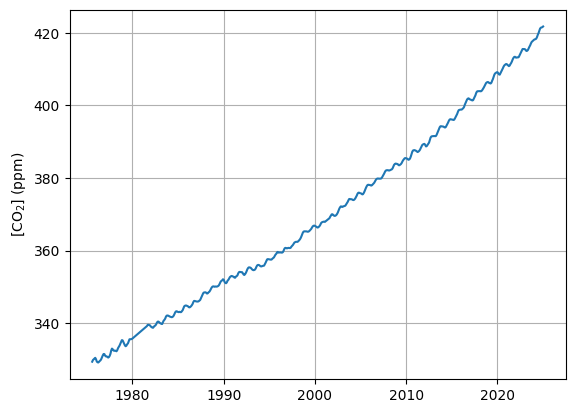

In [ ]:
# Read SPO data and define fractional year variable
spo = pd.read_fwf(
    "co2_spo_surface-flask_1_ccgg_month.txt",
    skiprows=53,
    header=None,
    names=["code", "year", "month", "co2"],
)
spo["frac_year"] = spo["year"] + spo["month"] / 12.0

# Display SPO CO2 time series
plt.figure()
plt.plot(spo["frac_year"], spo["co2"])
plt.ylabel("[CO$_2$] (ppm)")
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
<b> Instruction:</b> Now combine the MLO and SPO data in a single figure. Does this help to see differences that were not yet apparent at first?</div>

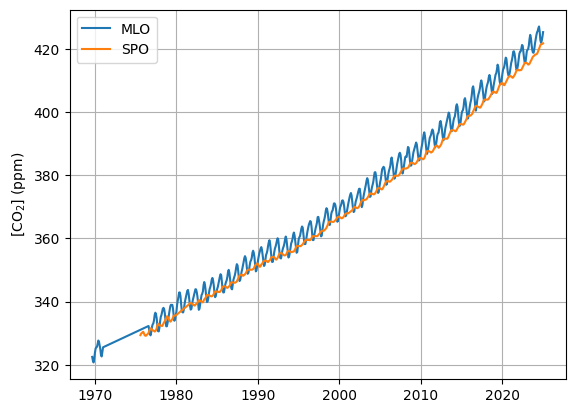

In [ ]:
# Show graph with MLO and SPO dataset combined
plt.figure()
plt.plot(mlo["frac_year"], mlo["co2"], label="MLO")
plt.plot(spo["frac_year"], spo["co2"], label="SPO")
plt.ylabel("[CO$_2$] (ppm)")
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
<b> Instruction:</b> One of differences between MLO and SPO is that the $\mathrm{CO_2}$ concentration at MLO is higher and this difference is also increasing over many years. We can make this more clear by first removing the seasonal variation (by taking the annual mean $\mathrm{CO_2}$ concentration).</div>


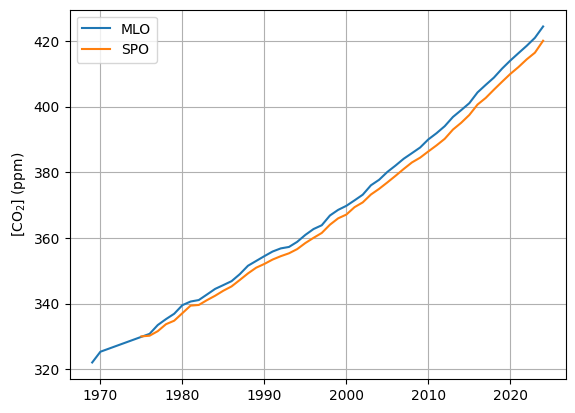

In [ ]:
# Calculate annual means for MLO and SPO dataset
mlo_annual_mean = mlo.groupby("year")["co2"].mean().reset_index()
spo_annual_mean = spo.groupby("year")["co2"].mean().reset_index()

# Show annual means for MLO and SPO
plt.figure()
plt.plot(mlo_annual_mean["year"], mlo_annual_mean["co2"], label="MLO")
plt.plot(spo_annual_mean["year"], spo_annual_mean["co2"], label="SPO")
plt.ylabel("[CO$_2$] (ppm)")
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-danger">
(1 pt) <b> Question 5:</b> Why is the annual mean $\mathrm{CO_2}$ for MLO higher than for SPO, and why is this difference increasing over time? (limit your answer to max. 40 words).</div>

(enter here your answer to Q5)

<positron-console-cell-14>:21: SyntaxWarning: invalid escape sequence '\D'


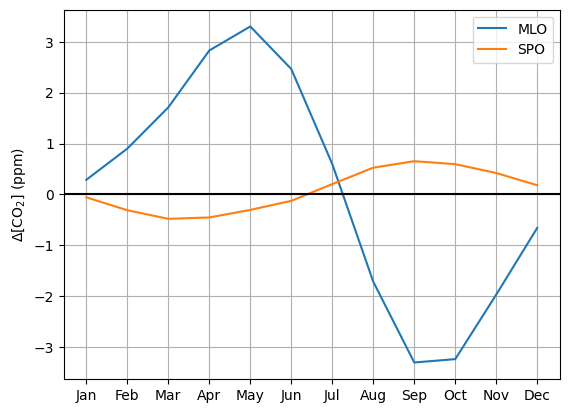

In [ ]:
# Determine trend in CO2
mlo["co2_trend"] = mlo["co2"].rolling(window=12, center=True).mean()
spo["co2_trend"] = spo["co2"].rolling(window=12, center=True).mean()

# Calculate detrended CO2
mlo["co2_detrended"] = mlo["co2"] - mlo["co2_trend"]
spo["co2_detrended"] = spo["co2"] - spo["co2_trend"]

# Determine seasonal cycle for detrended CO2 concentrations
mlo_monthly_mean = mlo.groupby("month")["co2_detrended"].mean().reset_index()
spo_monthly_mean = spo.groupby("month")["co2_detrended"].mean().reset_index()

# Define list of months
months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

# Show detrended seasonal cycle
plt.figure()
plt.plot(months, mlo_monthly_mean["co2_detrended"], label="MLO")
plt.plot(months, spo_monthly_mean["co2_detrended"], label="SPO")
plt.axhline(0, color="k")
plt.ylabel("$\Delta$[CO$_2$] (ppm)")
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-danger">
(1 pt) <b> Question 6:</b> What is the mean amplitude of the seasonal cycle for MLO and SPO? Explain differences in amplitude and phase of the signal. (limit your answer to max. 40 words). </div>

(enter here your answer to Q6)

<div class="alert alert-block alert-danger">
(1 pt) <b> Question 7:</b> In some years the $\mathrm{CO_2}$ concentration increases more than in other years, in which years do you expect a large increase and why? Hint: see also <a href="https://doi.org/10.1073/pnas.1219683110">Wang et al. (2013)</a>. (limit your answer to max. 40 words).</div>

(enter here your answer to Q7)

__Make sure to submit this Notebook with your added answers to Brightspace__ 